# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy

# Notebook Presentation

In [46]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [47]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [48]:
data.shape

(5391, 6)

In [49]:
data.isna().values.any()

False

In [50]:
data.duplicated().values.any()

False

In [51]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [52]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [53]:
columns_to_convert = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]
for column in columns_to_convert:
    data[column] = data[column].str.replace("$", "").str.replace(",", "").astype(float)


In [56]:
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00"
1,5140,5/9/1916,Intolerance,"385,907.00",0.00,0.00
2,5230,12/24/1916,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00"
4,5222,1/1/1925,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"15,000,000.00",0.00,0.00
5387,126,12/18/2018,Aquaman,"160,000,000.00",0.00,0.00
5388,96,12/31/2020,Singularity,"175,000,000.00",0.00,0.00
5389,1119,12/31/2020,Hannibal the Conqueror,"50,000,000.00",0.00,0.00


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [59]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   float64       
 4   USD_Worldwide_Gross    5391 non-null   float64       
 5   USD_Domestic_Gross     5391 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [61]:
data.USD_Production_Budget.mean()

31113737.57837136

In [62]:
data.USD_Worldwide_Gross.mean()

88855421.96271564

In [71]:
for element in [data.USD_Domestic_Gross, data.USD_Worldwide_Gross]:
    print(element.min())

0.0
0.0


In [77]:
data["Profits"] = data.USD_Worldwide_Gross - data.USD_Production_Budget
data.Profits.quantile(q=0.25)

-2244775.0

In [89]:
print(data[data.USD_Production_Budget == data.USD_Production_Budget.max()])
print(data[data.USD_Worldwide_Gross == data.USD_Worldwide_Gross.max()])

      Rank Release_Date Movie_Title  USD_Production_Budget  \
3529     1   2009-12-18      Avatar         425,000,000.00   

      USD_Worldwide_Gross  USD_Domestic_Gross          Profits  
3529     2,783,918,982.00      760,507,625.00 2,358,918,982.00  
      Rank Release_Date Movie_Title  USD_Production_Budget  \
3529     1   2009-12-18      Avatar         425,000,000.00   

      USD_Worldwide_Gross  USD_Domestic_Gross          Profits  
3529     2,783,918,982.00      760,507,625.00 2,358,918,982.00  


In [82]:
print(data.USD_Worldwide_Gross[data.USD_Production_Budget == data.USD_Production_Budget.min()].values)
print(data.USD_Worldwide_Gross[data.USD_Production_Budget == data.USD_Production_Budget.max()].values)


[181041.]
[2.78391898e+09]


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [95]:
data[data.USD_Domestic_Gross == 0].__len__()

512

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [96]:
data[data.USD_Worldwide_Gross == 0].__len__()

357

### Filtering on Multiple Conditions

In [106]:
international_releases = data[(data.USD_Worldwide_Gross > 0) & (data.USD_Domestic_Gross == 0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profits
71,4310,1956-02-16,Carousel,"3,380,000.00","3,220.00",0.00,"-3,376,780.00"
1579,5087,2001-02-11,Everything Put Together,"500,000.00","7,890.00",0.00,"-492,110.00"
1744,3695,2001-12-31,The Hole,"7,500,000.00","10,834,406.00",0.00,"3,334,406.00"
2155,4236,2003-12-31,Nothing,"4,000,000.00","63,180.00",0.00,"-3,936,820.00"
2203,2513,2004-03-31,The Touch,"20,000,000.00","5,918,742.00",0.00,"-14,081,258.00"
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,"36,000,000.00","1,480,089.00",0.00,"-34,519,911.00"
5348,2225,2017-05-05,Chāi dàn zhuānjiā,"23,000,000.00","58,807,172.00",0.00,"35,807,172.00"
5360,4832,2017-07-03,Departure,"1,100,000.00","27,561.00",0.00,"-1,072,439.00"
5372,1856,2017-08-25,Ballerina,"30,000,000.00","48,048,527.00",0.00,"18,048,527.00"


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [54]:
international_releases = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross > 0")
international_releases

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [55]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [107]:
data[data.Release_Date > scrape_date]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profits
5384,321,2018-09-03,A Wrinkle in Time,"103,000,000.00",0.00,0.00,"-103,000,000.00"
5385,366,2018-10-08,Amusement Park,"100,000,000.00",0.00,0.00,"-100,000,000.00"
5386,2950,2018-10-08,Meg,"15,000,000.00",0.00,0.00,"-15,000,000.00"
5387,126,2018-12-18,Aquaman,"160,000,000.00",0.00,0.00,"-160,000,000.00"
5388,96,2020-12-31,Singularity,"175,000,000.00",0.00,0.00,"-175,000,000.00"
5389,1119,2020-12-31,Hannibal the Conqueror,"50,000,000.00",0.00,0.00,"-50,000,000.00"
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The","20,000,000.00",0.00,0.00,"-20,000,000.00"


In [108]:
data[data.Release_Date > scrape_date].__len__()

7

In [111]:
data_clean = data[data.Release_Date < scrape_date]
data_clean.sort_values("Release_Date", ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profits
5383,2521,2017-12-31,The Thousand Miles,"20,000,000.00",0.00,0.00,"-20,000,000.00"
5382,1254,2017-12-05,Snatched,"42,000,000.00","57,850,343.00","45,850,343.00","15,850,343.00"
5381,94,2017-12-05,King Arthur: Legend of the Sword,"175,000,000.00","140,012,608.00","39,175,066.00","-34,987,392.00"
5380,70,2017-10-03,Kong: Skull Island,"185,000,000.00","561,137,727.00","168,052,812.00","376,137,727.00"
5379,1295,2017-10-02,John Wick: Chapter Two,"40,000,000.00","166,893,990.00","92,029,184.00","126,893,990.00"
...,...,...,...,...,...,...,...
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00","21,755,000.00"
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00","2,900,000.00"
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00","7,800,000.00"
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00,"-385,907.00"


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [113]:
len(data_clean[data_clean.Profits < data_clean.USD_Production_Budget])/len(data_clean)*100

55.07057949479941

# Seaborn for Data Viz: Bubble Charts

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



<Axes: xlabel='Release_Date', ylabel='USD_Production_Budget'>

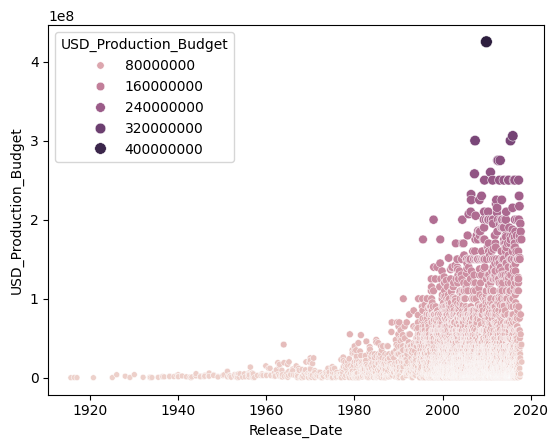

In [119]:
sns.scatterplot(data_clean, x=data_clean.Release_Date, y=data_clean.USD_Production_Budget, size=data_clean.USD_Production_Budget, hue=data_clean.USD_Production_Budget)

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [123]:
data_clean["Decade"] = (pd.DatetimeIndex(data_clean.Release_Date)).year//10 * 10 
data_clean

C:\Users\gerar\AppData\Local\Temp\ipykernel_18388\532288636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["Decade"] = (pd.DatetimeIndex(data_clean.Release_Date)).year//10 * 10


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Profits,Decade
0,5293,1915-08-02,The Birth of a Nation,"110,000.00","11,000,000.00","10,000,000.00","10,890,000.00",1910
1,5140,1916-05-09,Intolerance,"385,907.00",0.00,0.00,"-385,907.00",1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea","200,000.00","8,000,000.00","8,000,000.00","7,800,000.00",1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,"100,000.00","3,000,000.00","3,000,000.00","2,900,000.00",1920
4,5222,1925-01-01,The Big Parade,"245,000.00","22,000,000.00","11,000,000.00","21,755,000.00",1920
...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,"40,000,000.00","166,893,990.00","92,029,184.00","126,893,990.00",2010
5380,70,2017-10-03,Kong: Skull Island,"185,000,000.00","561,137,727.00","168,052,812.00","376,137,727.00",2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,"175,000,000.00","140,012,608.00","39,175,066.00","-34,987,392.00",2010
5382,1254,2017-12-05,Snatched,"42,000,000.00","57,850,343.00","45,850,343.00","15,850,343.00",2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [126]:
old_films = data_clean[data_clean.Decade < 1970]
new_films = data_clean[data_clean.Decade >= 1970]
print(len(old_films))
print(old_films[old_films.USD_Production_Budget == old_films.USD_Production_Budget.max()])

153
     Rank Release_Date Movie_Title  USD_Production_Budget  \
109  1253   1963-12-06   Cleopatra          42,000,000.00   

     USD_Worldwide_Gross  USD_Domestic_Gross       Profits  Decade  
109        71,000,000.00       57,000,000.00 29,000,000.00    1960  


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

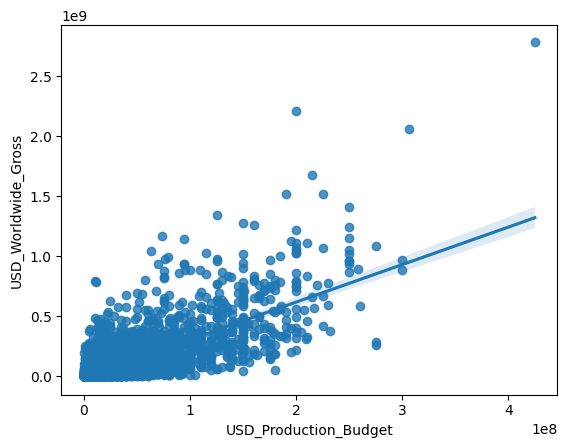

In [127]:
sns.regplot(new_films, x=new_films.USD_Production_Budget, y=new_films.USD_Worldwide_Gross)

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

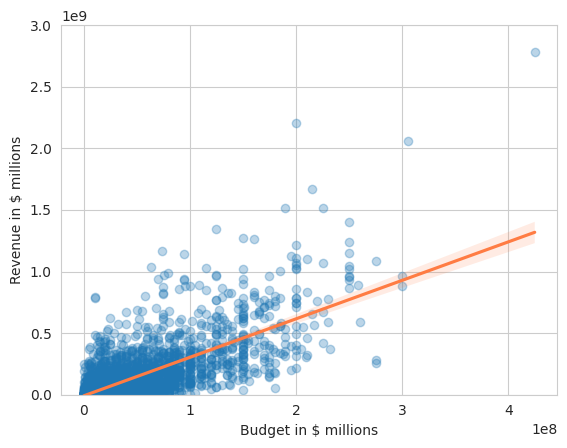

In [136]:
with sns.axes_style("whitegrid"):
    ax = sns.regplot(
        new_films,
        x=new_films.USD_Production_Budget, 
        y=new_films.USD_Worldwide_Gross,
        scatter_kws = {'alpha': 0.3},
        line_kws = {'color': '#ff7c43'}
        
    )
    ax.set(
        ylim=(0,3000000000),
        ylabel="Revenue in $ millions",
        xlabel="Budget in $ millions"
    )


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [162]:
regression = LinearRegression()
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [163]:
regression.fit(X, y)

LinearRegression()

In [164]:
regression.coef_

array([[1.64771314]])

In [165]:
regression.intercept_

array([22821538.63508039])

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [169]:
regression.predict(numpy.array([[350000000]]))

C:\Users\gerar\Documents\PyProjects\PyBootcamp100\78-scikitlearn\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[5.99521139e+08]])